In [83]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib as pyplot
%matplotlib inline
import seaborn as sns

In [84]:
#Data location
import os
os.chdir('D:\\DS\\Python DS\\Sample\\Black Friday Sales Prediction\\')

In [85]:
#Read Data
BF_xtrain = pd.read_csv('train.csv')
BF_xtest = pd.read_csv('test.csv')
BF_ytrain = pd.read_csv('train.csv')
BF_ytest = pd.read_csv('test.csv')

#Convert symbol
BF_xtrain["Stay_In_Current_City_Years"]=BF_xtrain["Stay_In_Current_City_Years"].replace(["4+"], "4")
BF_xtest["Stay_In_Current_City_Years"]=BF_xtest["Stay_In_Current_City_Years"].replace(["4+"], "4")
BF_ytrain["Stay_In_Current_City_Years"]=BF_ytrain["Stay_In_Current_City_Years"].replace(["4+"], "4")
BF_ytest["Stay_In_Current_City_Years"]=BF_ytest["Stay_In_Current_City_Years"].replace(["4+"], "4")

In [86]:
BF_ytrain

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [87]:
BF_xtrain["Age"]

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
5         26-35
6         46-50
7         46-50
8         46-50
9         26-35
10        26-35
11        26-35
12        26-35
13        26-35
14        51-55
15        51-55
16        51-55
17        51-55
18        36-45
19        26-35
20        26-35
21        26-35
22        26-35
23        26-35
24        26-35
25        26-35
26        26-35
27        26-35
28        26-35
29        36-45
          ...  
550038    36-45
550039    26-35
550040    26-35
550041    46-50
550042    51-55
550043    46-50
550044    26-35
550045    26-35
550046     0-17
550047    26-35
550048    36-45
550049    36-45
550050    36-45
550051    26-35
550052    46-50
550053    36-45
550054    36-45
550055    26-35
550056    26-35
550057    26-35
550058    26-35
550059    26-35
550060    36-45
550061    26-35
550062    46-50
550063    51-55
550064    26-35
550065    26-35
550066      55+
550067    46-50
Name: Age, Length: 55006

In [88]:
#Convert the Age Categorical data to numeric
BF_xtrain["Age"] = BF_xtrain["Age"].astype("category")
BF_xtrain["Age"] = BF_xtrain["Age"].cat.codes

BF_xtest["Age"] = BF_xtest["Age"].astype("category")
BF_xtest["Age"] = BF_xtest["Age"].cat.codes

BF_ytrain["Age"] = BF_ytrain["Age"].astype("category")
BF_ytrain["Age"] = BF_ytrain["Age"].cat.codes

BF_ytest["Age"] = BF_ytest["Age"].astype("category")
BF_ytest["Age"] = BF_ytest["Age"].cat.codes

In [89]:
BF_xtrain

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,6,16,C,4,0,8,NaN,NaN,7969
5,1000003,P00193542,M,2,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,4,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,4,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,4,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,2,20,A,1,1,8,NaN,NaN,7871


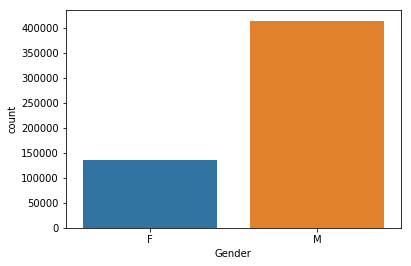

In [90]:
sns.countplot(BF_xtrain['Gender'])

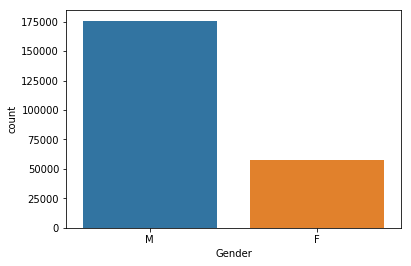

In [91]:
sns.countplot(BF_xtest['Gender'])

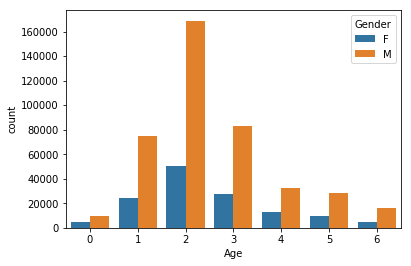

In [92]:
sns.countplot(BF_xtrain['Age'], hue=BF_xtrain['Gender'])

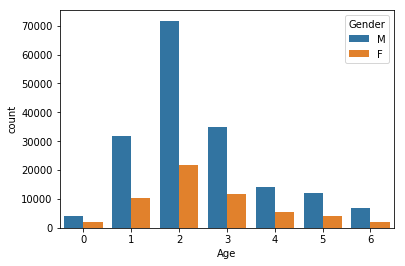

In [93]:
sns.countplot(BF_xtest['Age'], hue=BF_xtest['Gender'])

In [94]:
BF_xtrain['Gender'] = BF_xtrain['Gender'].astype('category')
BF_xtrain['Gender'] = BF_xtrain['Gender'].cat.codes
###
BF_xtest['Gender'] = BF_xtest['Gender'].astype('category')
BF_xtest['Gender'] = BF_xtest['Gender'].cat.codes

BF_ytrain['Gender'] = BF_ytrain['Gender'].astype('category')
BF_ytrain['Gender'] = BF_ytrain['Gender'].cat.codes

BF_ytest['Gender'] = BF_ytest['Gender'].astype('category')
BF_ytest['Gender'] = BF_ytest['Gender'].cat.codes

In [95]:
#check for null
BF_xtrain.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [96]:
BF_ytrain.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [97]:
BF_xtest.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [98]:
BF_xtest.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

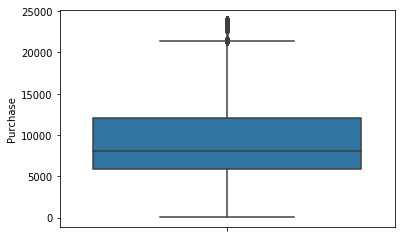

In [99]:
sns.boxplot(y='Purchase', data=BF_xtrain)

In [100]:
#Length of Train
len(BF_xtrain.columns)

12

In [101]:
len(BF_xtest.columns)

11

In [102]:
BF_xtrain.corr()

,User_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.011603,-0.045594,-0.018591,0.028069,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,0.311738,0.061197,0.054877,0.057346,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,-0.011603,0.311738,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.018591,0.054877,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.028069,0.057346,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.060346,0.015839,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [103]:
BF_xtest.corr()

,User_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,1.000000,-0.037470,0.031642,-0.023988,0.019883,0.006428,0.004065,0.000316
Gender,-0.037470,1.000000,-0.005925,0.114658,-0.009395,-0.047830,-0.016201,0.023903
Age,0.031642,-0.005925,1.000000,0.089509,0.308407,0.058295,0.055050,0.055819
Occupation,-0.023988,0.114658,0.089509,1.000000,0.021872,-0.010465,-0.001685,0.003838
Marital_Status,0.019883,-0.009395,0.308407,0.021872,1.000000,0.018860,0.021766,0.016119
Product_Category_1,0.006428,-0.047830,0.058295,-0.010465,0.018860,1.000000,0.540063,0.225054
Product_Category_2,0.004065,-0.016201,0.055050,-0.001685,0.021766,0.540063,1.000000,0.543417
Product_Category_3,0.000316,0.023903,0.055819,0.003838,0.016119,0.225054,0.543417,1.000000


In [104]:
BF_xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int8
Age                           550068 non-null int8
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), int8(2), object(3)
memory usage: 43.0+ MB


In [105]:
BF_xtrain.describe()

,User_ID,Gender,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,0.753105,2.496430,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,0.431205,1.353632,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,1.000000,2.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,1.000000,2.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,1.000000,3.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,1.000000,6.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


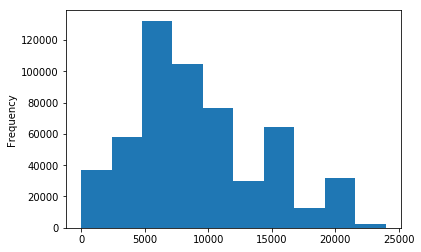

In [106]:
BF_xtrain['Purchase'].plot.hist()

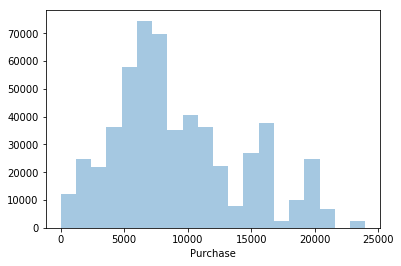

In [107]:
sns.distplot(BF_xtrain['Purchase'],kde=False,bins=20)

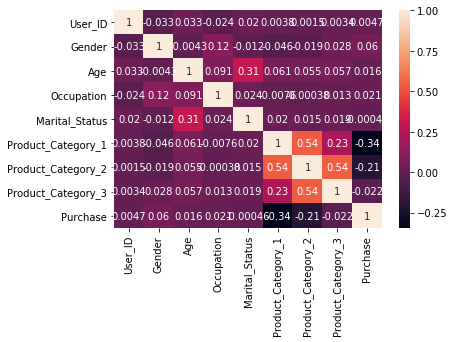

In [108]:
sns.heatmap(BF_xtrain.corr(), annot=True)

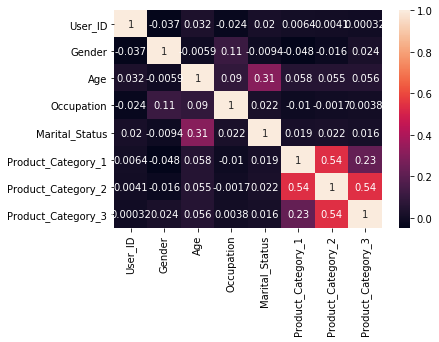

In [109]:
sns.heatmap(BF_xtest.corr(), annot=True)

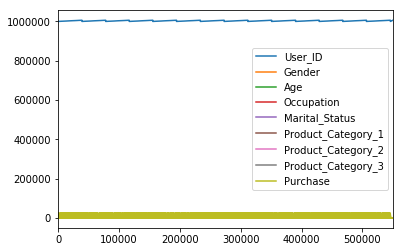

In [110]:
BF_xtrain.plot()

In [111]:
#X dataset
BF_xtrain=BF_xtrain.iloc[:,2:11].values
BF_xtest=BF_xtest.iloc[:,2:11].values

In [112]:
#y Dataset
BF_ytrain=BF_ytrain.iloc[:,11].values

In [113]:
pd.DataFrame(BF_xtrain)

,0,1,2,3,4,5,6,7,8
0,0,0,10,A,2,0,3,NaN,NaN
1,0,0,10,A,2,0,1,6,14
2,0,0,10,A,2,0,12,NaN,NaN
3,0,0,10,A,2,0,12,14,NaN
4,1,6,16,C,4,0,8,NaN,NaN
5,1,2,15,A,3,0,1,2,NaN
6,1,4,7,B,2,1,1,8,17
7,1,4,7,B,2,1,1,15,NaN
8,1,4,7,B,2,1,1,16,NaN
9,1,2,20,A,1,1,8,NaN,NaN


In [114]:
pd.DataFrame(BF_xtest)

,0,1,2,3,4,5,6,7,8
0,1,4,7,B,2,1,1,11,NaN
1,1,2,17,C,0,0,3,5,NaN
2,0,3,1,B,4,1,5,14,NaN
3,0,3,1,B,4,1,4,9,NaN
4,0,2,1,C,1,0,4,5,12
5,1,4,1,C,3,1,2,3,15
6,1,4,1,C,3,1,1,11,15
7,1,4,1,C,3,1,2,4,9
8,1,2,7,A,1,0,10,13,16
9,1,1,15,A,4,0,5,14,NaN


In [115]:
#Missing Value treatment
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy ='median', axis=0)
imputer = imputer.fit(BF_xtrain[:,7:9])
BF_xtrain[:,7:9] = imputer.transform(BF_xtrain[:,7:9])

D:\DS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [116]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy ='median', axis=0)
imputer = imputer.fit(BF_xtest[:,7:9])
BF_xtest[:,7:9] = imputer.transform(BF_xtest[:,7:9])

D:\DS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [117]:
pd.DataFrame(BF_xtrain).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [118]:
pd.DataFrame(BF_xtest).isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [119]:
pd.DataFrame(BF_xtrain)

,0,1,2,3,4,5,6,7,8
0,0,0,10,A,2,0,3,9,14
1,0,0,10,A,2,0,1,6,14
2,0,0,10,A,2,0,12,9,14
3,0,0,10,A,2,0,12,14,14
4,1,6,16,C,4,0,8,9,14
5,1,2,15,A,3,0,1,2,14
6,1,4,7,B,2,1,1,8,17
7,1,4,7,B,2,1,1,15,14
8,1,4,7,B,2,1,1,16,14
9,1,2,20,A,1,1,8,9,14


In [120]:
#Categorical Data convert to Numeric
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
BF_xtrain[:,3] = label.fit_transform(BF_xtrain[:,3])

In [122]:
pd.DataFrame(BF_xtrain)
# pd.DataFrame(BF_ytrain)
# pd.DataFrame(BF_xtest)

,0,1,2,3,4,5,6,7,8
0,0,0,10,0,2,0,3,9,14
1,0,0,10,0,2,0,1,6,14
2,0,0,10,0,2,0,12,9,14
3,0,0,10,0,2,0,12,14,14
4,1,6,16,2,4,0,8,9,14
5,1,2,15,0,3,0,1,2,14
6,1,4,7,1,2,1,1,8,17
7,1,4,7,1,2,1,1,15,14
8,1,4,7,1,2,1,1,16,14
9,1,2,20,0,1,1,8,9,14


In [124]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label=LabelEncoder()
BF_xtest[:,3] = label.fit_transform(BF_xtest[:,3])

In [125]:
pd.DataFrame(BF_xtest)

,0,1,2,3,4,5,6,7,8
0,1,4,7,1,2,1,1,11,14
1,1,2,17,2,0,0,3,5,14
2,0,3,1,1,4,1,5,14,14
3,0,3,1,1,4,1,4,9,14
4,0,2,1,2,1,0,4,5,12
5,1,4,1,2,3,1,2,3,15
6,1,4,1,2,3,1,1,11,15
7,1,4,1,2,3,1,2,4,9
8,1,2,7,0,1,0,10,13,16
9,1,1,15,0,4,0,5,14,14


In [70]:
# onehotencoder = OneHotEncoder(categorical_features=[1])
# BF_xtest = onehotencoder.fit_transform(BF_xtest).toarray()

D:\DS\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\DS\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [126]:
pd.DataFrame(BF_xtest)

,0,1,2,3,4,5,6,7,8
0,1,4,7,1,2,1,1,11,14
1,1,2,17,2,0,0,3,5,14
2,0,3,1,1,4,1,5,14,14
3,0,3,1,1,4,1,4,9,14
4,0,2,1,2,1,0,4,5,12
5,1,4,1,2,3,1,2,3,15
6,1,4,1,2,3,1,1,11,15
7,1,4,1,2,3,1,2,4,9
8,1,2,7,0,1,0,10,13,16
9,1,1,15,0,4,0,5,14,14


In [127]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(BF_xtrain, BF_xtrain, test_size=0.3)

In [128]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [129]:
#Prediction
y_pred=reg.predict(y_test)

In [130]:
y_pred

array([[-6.85501683e-14,  3.00000000e+00,  1.00000000e+00, ...,
         5.00000000e+00,  8.00000000e+00,  1.40000000e+01],
       [ 1.00000000e+00,  4.00000000e+00,  3.26155163e-15, ...,
         1.10000000e+01,  1.40000000e+01,  1.40000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  4.00000000e+00, ...,
         1.00000000e+00,  9.00000000e+00,  1.40000000e+01],
       ...,
       [ 1.00000000e+00,  2.00000000e+00,  1.20000000e+01, ...,
         5.00000000e+00,  1.40000000e+01,  1.40000000e+01],
       [-6.84709433e-14,  2.00000000e+00,  4.00000000e+00, ...,
         5.00000000e+00,  9.00000000e+00,  1.40000000e+01],
       [ 1.00000000e+00,  1.00000000e+00,  4.00000000e+00, ...,
         5.00000000e+00,  9.00000000e+00,  1.40000000e+01]])

In [131]:
#R-Square
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

1.0

In [132]:
reg.coef_

array([[ 1.00000000e+00, -2.58145071e-16, -7.82342564e-18,
         6.70063759e-18,  6.70157027e-17, -1.00496692e-16,
        -1.05029398e-17, -2.14183271e-17,  3.77812650e-19],
       [-6.53987129e-16,  1.00000000e+00, -8.82470566e-17,
        -4.07814059e-16, -3.51334139e-16,  8.86654194e-17,
        -2.76759517e-16,  6.91461720e-18,  1.49972208e-16],
       [ 1.10641647e-14, -7.42487115e-16,  1.00000000e+00,
        -4.50411541e-17,  6.77561494e-16,  2.58321782e-16,
         1.47161344e-16,  7.11029098e-18,  1.06071415e-16],
       [-1.81232693e-16, -1.43708039e-15, -1.03361831e-16,
         1.00000000e+00, -2.16691543e-16, -1.12159157e-16,
        -8.82124748e-18,  6.93604179e-17, -3.53557912e-16],
       [-2.22952297e-18, -1.63769406e-16,  4.76906594e-17,
         6.72732729e-16,  1.00000000e+00,  2.24881161e-16,
         5.28037848e-17, -2.54406630e-16, -6.13451942e-17],
       [-7.22052142e-16, -1.89798182e-15, -2.67938556e-17,
        -4.39620067e-16,  2.17492114e-16,  1.000000

In [133]:
reg.intercept_

array([-6.77236045e-14,  6.97220059e-14, -8.88178420e-15,  8.43769499e-15,
        2.22044605e-16,  6.71684930e-15,  1.86517468e-14,  2.48689958e-14,
       -1.77635684e-15])